In [2]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/kepler-labelled-time-series-data/exoTest.csv
/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv


In [3]:
train_df=pd.read_csv("/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv")
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
train_df.shape

(5087, 3198)

In [5]:
train_df[train_df.isnull().any(axis=1)]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


<Axes: >

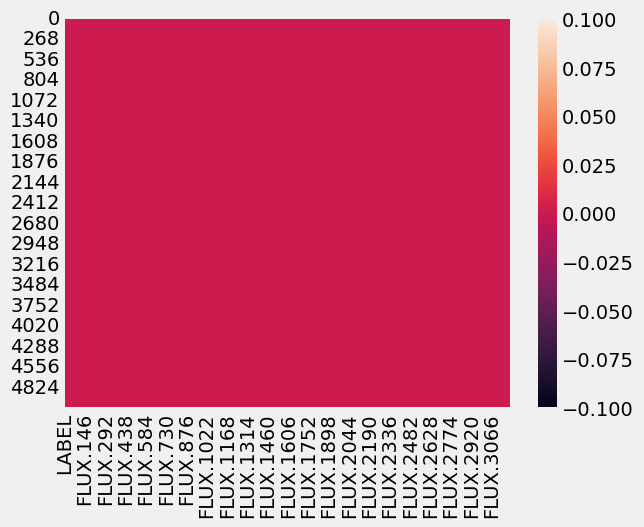

In [6]:
sns.heatmap(train_df.isnull())

In [7]:
train_df['LABEL'].unique()

array([2, 1])

In [8]:
list(train_df[train_df['LABEL']==2].index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

[Text(0, 0, '5050'), Text(0, 0, '37')]

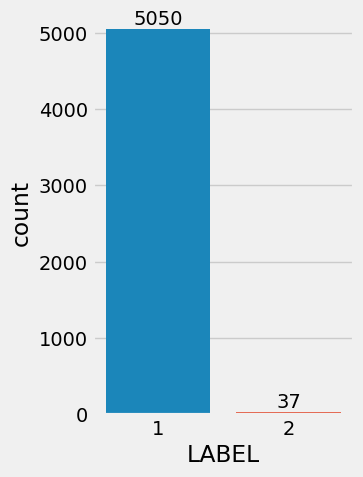

In [9]:
plt.figure(figsize=(3,5))
ax=sns.countplot(x='LABEL', data=train_df)
ax.bar_label(ax.containers[0])

In [10]:
# Replacing labels
train_df=train_df.replace({"LABEL" : {1 : 0, 2 : 1}})
train_df.LABEL.unique()

array([1, 0])

In [11]:
plot_df = train_df.drop(["LABEL"], axis=1)
plot_df

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,384.34,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,238.51,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,6.29,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [ ]:
# Star systems with exoplanet
time=range(1, 3198)
flux_val=plot_df.iloc[3,:].values
plt.figure(figsize=(15,5))
plt.plot(time, flux_val, linewidth=1)

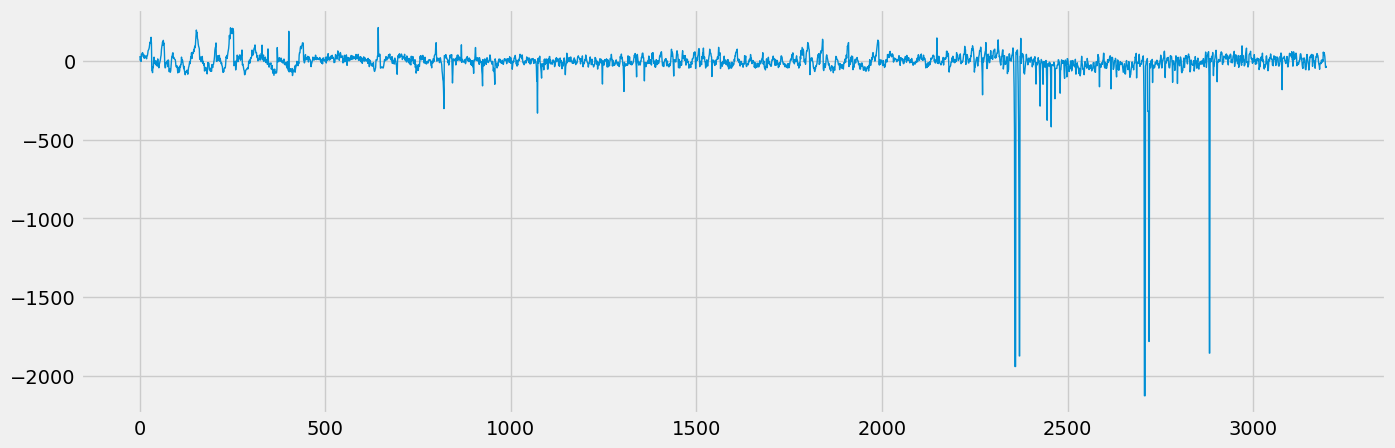

In [13]:
# Star systems without exoplanets
time=range(1, 3198)
flux_val=plot_df.iloc[100,:].values
plt.figure(figsize=(15,5))
plt.plot(time, flux_val, linewidth=1)

In [ ]:
# Star systems with exoplanet
time=range(1, 3198)
flux_val=plot_df.iloc[120,:].values
plt.figure(figsize=(15,5))
plt.plot(time, flux_val, linewidth=1)

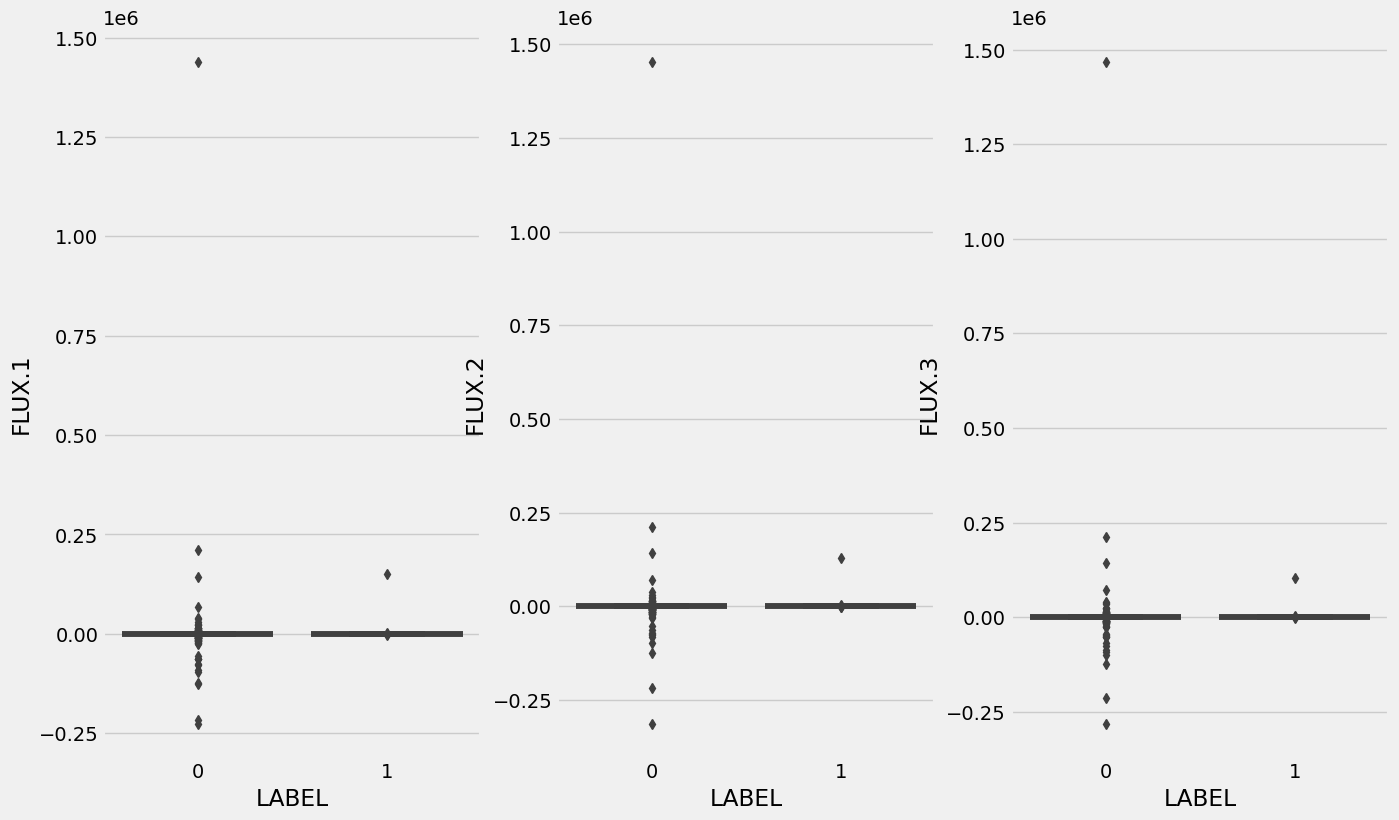

In [15]:
plt.figure(figsize=(20,9))
for i in range(1,4):
    plt.subplot(1, 4, i)
    sns.boxplot(data=train_df, x="LABEL", y='FLUX.'+str(i))

In [16]:
train_df.drop(train_df[train_df["FLUX.2"]>0.25e6].index, axis=0, inplace=True)

<Axes: xlabel='LABEL', ylabel='FLUX.132'>

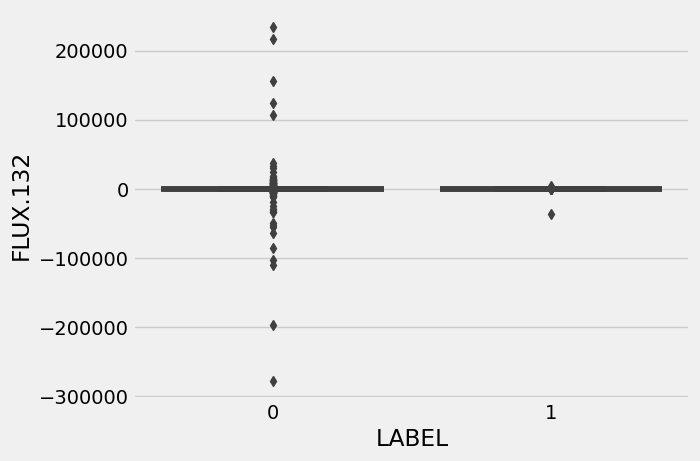

In [17]:
sns.boxplot(data=train_df, x ='LABEL', y='FLUX.'+ str(np.random.randint(1000)))

In [24]:
# Extracting independent (x) and dependent(y)
x=train_df.drop(['LABEL'], axis=1)
y=train_df.LABEL

In [25]:
x, y

(       FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7   FLUX.8  \
 0       93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   -96.27   
 1      -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   -85.33   
 2      532.64   535.92   513.73   496.92   456.45   466.00  464.50   486.39   
 3      326.52   347.39   302.35   298.13   317.74   312.70  322.33   311.31   
 4    -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34 -1022.71   
 ...       ...      ...      ...      ...      ...      ...     ...      ...   
 5082   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   -49.25   
 5083   989.75   891.01   908.53   851.83   755.11   615.78  595.77   458.87   
 5084   273.39   278.00   261.73   236.99   280.73   264.90  252.92   254.88   
 5085     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85    -0.03   
 5086   323.28   306.36   293.16   287.67   249.89   218.30  188.86   178.93   
 
       FLUX.9  FLUX.10  ...  FLUX.3188

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0)

In [31]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [32]:
sc= StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [33]:
np.min(x_train_sc), np.max(x_train_sc)

(-57.10397981586141, 59.4602261831905)

In [34]:
np.min(x_test_sc), np.max(x_test_sc)

(-38.933246951307595, 38.9722064006283)

In [37]:
from sklearn.neighbors import KNeighborsClassifier as KNC

#Choosing k=5
knn_classifier = KNC(n_neighbors=5, metric="minkowski", p=2)

#Fitting the model
knn_classifier.fit(x_train_sc, y_train)
#Predicted values
y_pred=knn_classifier.predict(x_test_sc)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
print("Validation accuracy of KNN:-", accuracy_score(y_test, y_pred))
print()
print("Classification report:-", classification_report(y_test, y_pred))

Validation accuracy of KNN:- 0.991480996068152

Classification report:-               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1513
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1526
   macro avg       0.50      0.50      0.50      1526
weighted avg       0.98      0.99      0.99      1526



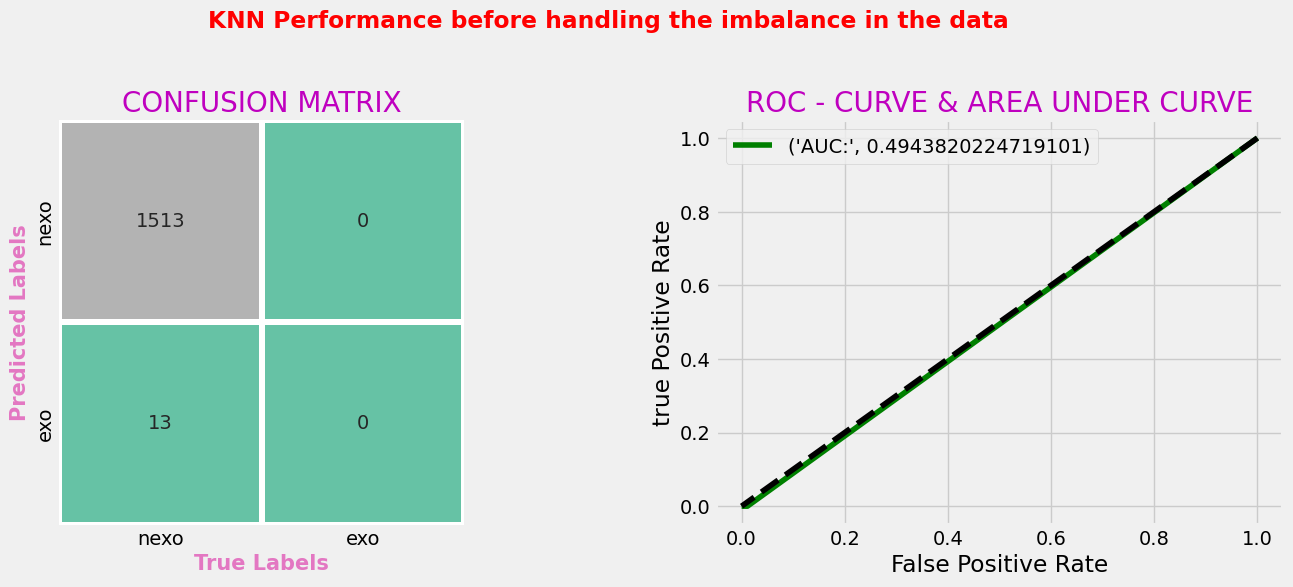

In [39]:
plt.figure(figsize=(15,11))
plt.subplots_adjust(wspace=0.3)
plt.suptitle("KNN Performance before handling the imbalance in the data", color='r', weight='bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Set2', fmt='d', linewidths=3, cbar=False, xticklabels=['nexo','exo'], yticklabels=['nexo','exo'], square=True)
plt.xlabel("True Labels", fontsize=15, weight='bold', color='tab:pink')
plt.ylabel('Predicted Labels', fontsize=15, weight='bold', color='tab:pink')
plt.title("CONFUSION MATRIX", fontsize=20, color='m')

predicting_probabilities=knn_classifier.predict_proba(x_test_sc)[:,1]
fpr,tpr,thresholds= roc_curve(y_test, predicting_probabilities)
plt.subplot(222)
plt.plot(fpr, tpr, label=("AUC:", auc(fpr, tpr)), color="g")
plt.plot([1,0],[1,0],"k--")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("true Positive Rate")
plt.title("ROC - CURVE & AREA UNDER CURVE", fontsize=20, color='m')
plt.show()

In [40]:
# Handling the imbalanced data using imblearn
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)

<Axes: xlabel='LABEL'>

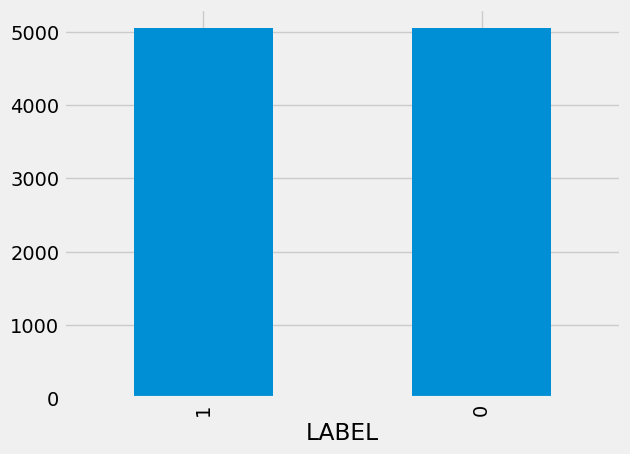

In [41]:
y_ros.value_counts().plot(kind='bar')

In [42]:
from collections import Counter
print(f"Before ROS:- {Counter(y)}\nAfter ROS:- {Counter(y_ros)}")


Before ROS:- Counter({0: 5049, 1: 37})
After ROS:- Counter({1: 5049, 0: 5049})


Text(0.5, 0, 'K values')

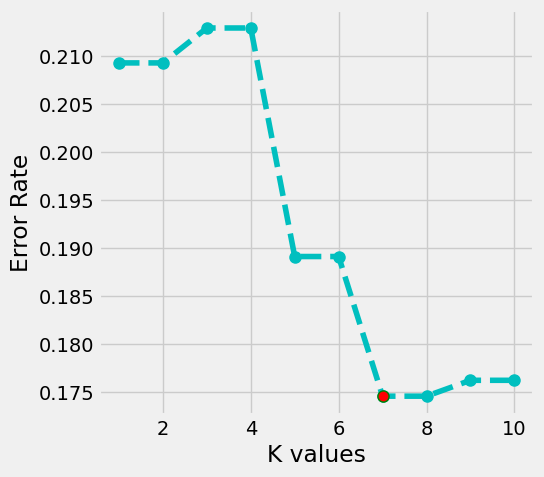

In [48]:
err_rate=[]
for k in range(1, 11):
    knn_clsfr=KNC(n_neighbors=k)
    knn_clsfr.fit(x_train_sc, y_train)
    pred=knn_clsfr.predict(x_test_sc)
    err_rate.append(np.mean(pred!=y_test))
    
arg, val= err_rate.index(min(err_rate)), min(err_rate)

plt.figure(figsize=(5,5))
plt.plot(range(1,11), err_rate, 'co--', markersize=8)
plt.plot(arg+1, val, marker='o', markersize=8, markerfacecolor='r', markeredgecolor='g')
plt.ylabel("Error Rate")
plt.xlabel("K values")

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x_ros, y_ros, test_size=0.3, random_state=0)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [49]:
from sklearn.neighbors import KNeighborsClassifier as KNC

#Choosing k=5
knn_classifier = KNC(n_neighbors=7, metric="minkowski", p=2)

#Fitting the model
knn_classifier.fit(x_train_sc, y_train)
#Predicted values
y_pred=knn_classifier.predict(x_test_sc)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
print("Validation accuracy of KNN:-", accuracy_score(y_test, y_pred))
print()
print("Classification report:-", classification_report(y_test, y_pred))

Validation accuracy of KNN:- 0.8254125412541254

Classification report:-               precision    recall  f1-score   support

           0       0.75      0.98      0.85      1512
           1       0.97      0.67      0.79      1518

    accuracy                           0.83      3030
   macro avg       0.86      0.83      0.82      3030
weighted avg       0.86      0.83      0.82      3030



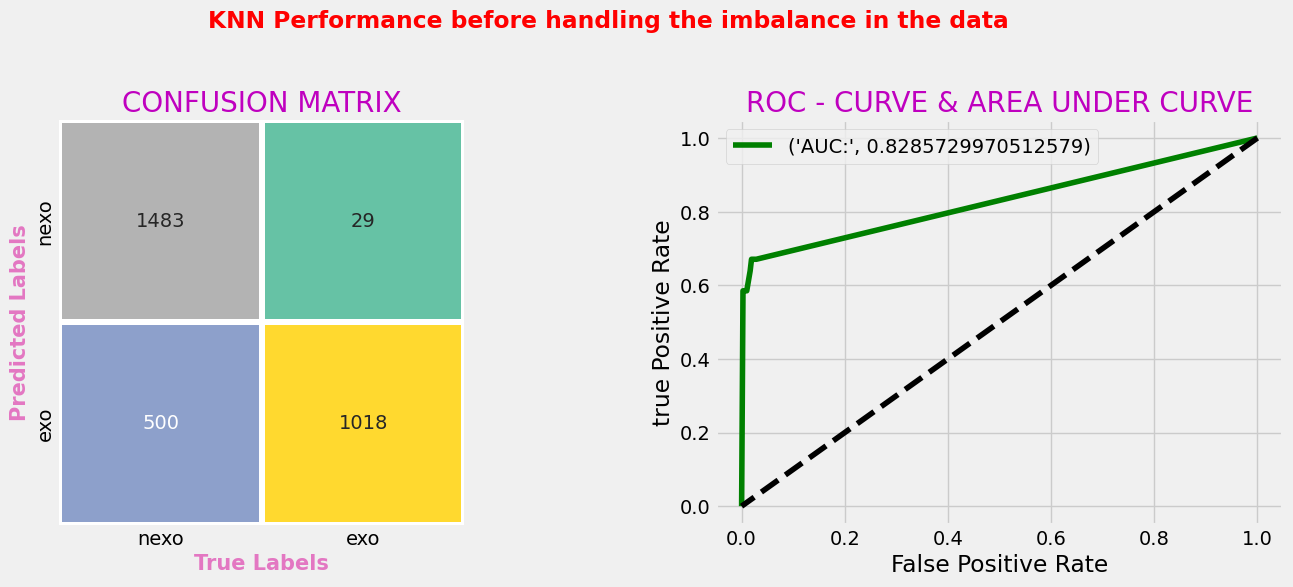

In [51]:
plt.figure(figsize=(15,11))
plt.subplots_adjust(wspace=0.3)
plt.suptitle("KNN Performance before handling the imbalance in the data", color='r', weight='bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Set2', fmt='d', linewidths=3, cbar=False, xticklabels=['nexo','exo'], yticklabels=['nexo','exo'], square=True)
plt.xlabel("True Labels", fontsize=15, weight='bold', color='tab:pink')
plt.ylabel('Predicted Labels', fontsize=15, weight='bold', color='tab:pink')
plt.title("CONFUSION MATRIX", fontsize=20, color='m')

predicting_probabilities=knn_classifier.predict_proba(x_test_sc)[:,1]
fpr,tpr,thresholds= roc_curve(y_test, predicting_probabilities)
plt.subplot(222)
plt.plot(fpr, tpr, label=("AUC:", auc(fpr, tpr)), color="g")
plt.plot([1,0],[1,0],"k--")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("true Positive Rate")
plt.title("ROC - CURVE & AREA UNDER CURVE", fontsize=20, color='m')
plt.show()